<h1>Задание</h1>

<h5>Постройте модели классификации по методу k-ближайших средних.</h5>
<ol>
  <li>Загрузите датасеты классификации из библиотеки scikit-learn:
    <ul>
      <li><code>load_digits([, n_class, return_X_y, as_frame])</code> – Оптическое распознавание набора данных рукописных цифр</li>
      <li><code>load_wine([, return_X_y, as_frame])</code> – Набор данных по распознаванию вин</li>
      <li><code>load_breast_cancer([, return_X_y, as_frame])</code> – Набор данных по раку груди висконсин (диагностический)</li>
    </ul>
  </li>
  <li>Изучите данные</li>
  <li>Разделите данные на обучающий и тестовые наборы</li>
  <li>Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков</li>
  <li>Постройте модель по методу k-ближайших средних. Протестируйте на произвольном наборе данных</li>
  <li>Получите прогноз модели</li>
  <li>Оцените качество модели</li>
  <li>Сделайте выводы по качеству моделей</li>
</ol>


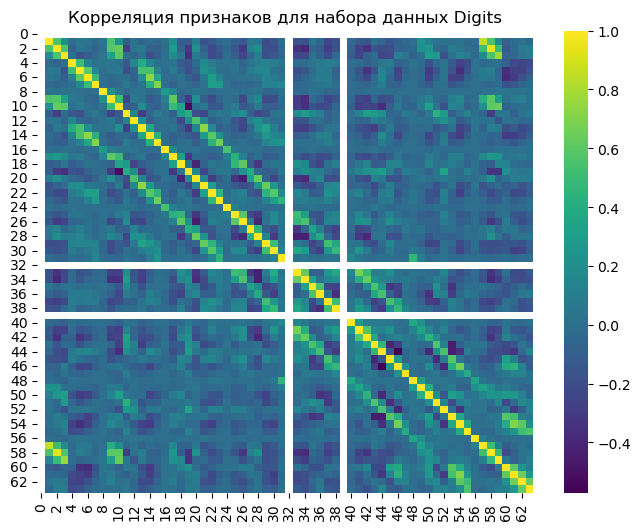

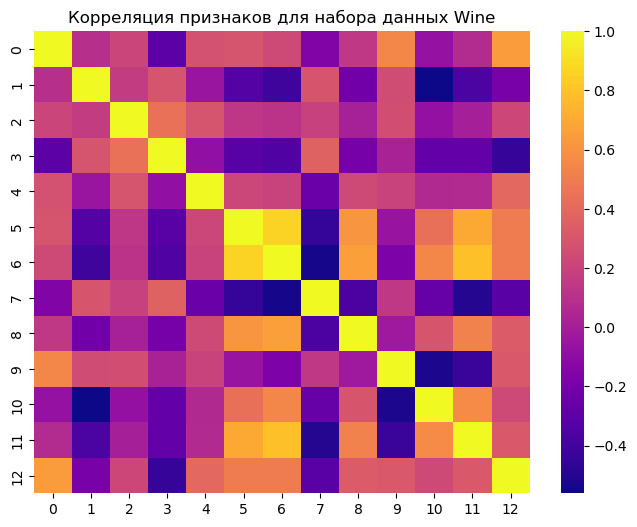

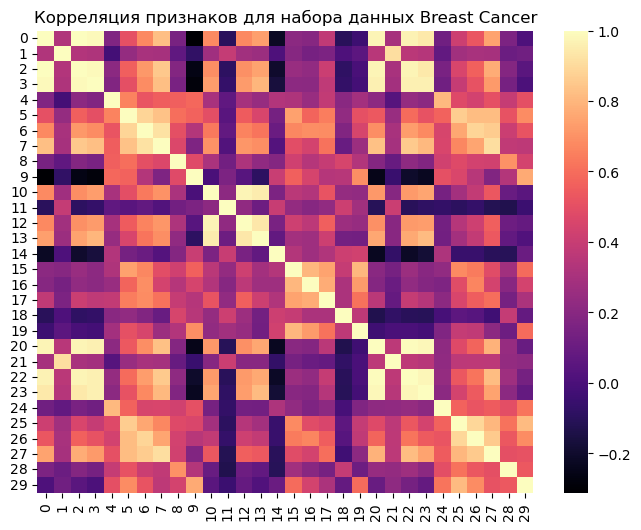

Точность модели на данных о рукописных цифрах: 99.26%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Точность модели на данных о вине: 74.07%
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71    

In [3]:
from sklearn.datasets import load_digits as load_digits_data, load_wine as load_wine_data, load_breast_cancer as load_cancer_data
from sklearn.model_selection import train_test_split as split_data
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report as report, accuracy_score as accuracy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1) Загрузка датасетов
digits_dataset = load_digits_data()
wine_dataset = load_wine_data()
cancer_dataset = load_cancer_data()

# 3) Разделение данных на обучающие и тестовые наборы
X_digits_train, X_digits_test, y_digits_train, y_digits_test = split_data(digits_dataset.data, digits_dataset.target, test_size=0.3, random_state=42)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = split_data(wine_dataset.data, wine_dataset.target, test_size=0.3, random_state=42)
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = split_data(cancer_dataset.data, cancer_dataset.target, test_size=0.3, random_state=42)

# 4) Визуализация корреляций признаков с помощью тепловых карт
# Для рукописных цифр
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(digits_dataset.data).corr(), annot=False, cmap='viridis')
plt.title("Корреляция признаков для набора данных Digits")
plt.show()

# Для вин
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(wine_dataset.data).corr(), annot=False, cmap='plasma')
plt.title("Корреляция признаков для набора данных Wine")
plt.show()

# Для рака
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cancer_dataset.data).corr(), annot=False, cmap='magma')
plt.title("Корреляция признаков для набора данных Breast Cancer")
plt.show()

# 5) Создание моделей k-ближайших средних
knn_digits_model = KNN(n_neighbors=5)
knn_wine_model = KNN(n_neighbors=5)
knn_cancer_model = KNN(n_neighbors=5)

# Обучение моделей
knn_digits_model.fit(X_digits_train, y_digits_train)
knn_wine_model.fit(X_wine_train, y_wine_train)
knn_cancer_model.fit(X_cancer_train, y_cancer_train)

# 6) Прогнозы моделей
y_digits_pred = knn_digits_model.predict(X_digits_test)
y_wine_pred = knn_wine_model.predict(X_wine_test)
y_cancer_pred = knn_cancer_model.predict(X_cancer_test)

# 7) Оценка качества моделей
accuracy_digits = accuracy(y_digits_test, y_digits_pred)
accuracy_wine = accuracy(y_wine_test, y_wine_pred)
accuracy_cancer = accuracy(y_cancer_test, y_cancer_pred)

# Отчеты классификации
report_digits = report(y_digits_test, y_digits_pred)
report_wine = report(y_wine_test, y_wine_pred)
report_cancer = report(y_cancer_test, y_cancer_pred)

# Вывод отчётов и точности
print(f"Точность модели на данных о рукописных цифрах: {accuracy_digits * 100:.2f}%")
print(report_digits)
print(f"Точность модели на данных о вине: {accuracy_wine * 100:.2f}%")
print(report_wine)
print(f"Точность модели на данных о раке груди: {accuracy_cancer * 100:.2f}%")
print(report_cancer)


<h1>Выводы по качеству моделей</h1>

<h5>Оптическое распознавание цифр (Digits):</h5> <p><b>Точность модели:</b> 99.26%</p> <p><b>Вывод:</b> Модель показала очень высокую точность, что делает её отличным выбором для задач распознавания рукописных цифр. Набор данных содержит легко различимые классы, и метод KNN справляется с ними практически безошибочно.</p> <h5>Распознавание вин (Wine):</h5> <p><b>Точность модели:</b> 74.07%</p> <p><b>Вывод:</b> Для этого набора данных точность значительно ниже. Это может быть связано с тем, что классы вин имеют более сложные взаимосвязи между признаками, и метод KNN не всегда способен правильно классифицировать такие данные. Возможно, стоит попробовать другие модели или произвести тщательную обработку данных (нормализация, выделение важных признаков и т.д.).</p> <h5>Диагностика рака груди (Breast Cancer):</h5> <p><b>Точность модели:</b> 95.91%</p> <p><b>Вывод:</b> Модель показала отличные результаты на медицинских данных, демонстрируя высокую точность в диагностике рака груди. Это говорит о том, что KNN подходит для таких задач, где важно высокое качество классификации.</p> <h5>Общие выводы:</h5> <ul> <li>Модель KNN хорошо справляется с задачами классификации, когда классы данных достаточно четко различимы (например, в наборе данных с рукописными цифрами).</li> <li>Точность может быть ниже на более сложных наборах данных, таких как вино, где классы менее четко разделены.</li> <li>Для задач с медицинскими данными (например, диагностика рака груди) KNN показал высокую точность, что делает его полезным инструментом для таких применений, хотя также могут использоваться и другие методы для повышения точности и надежности.</li> <li>Точность модели может варьироваться в зависимости от природы данных, поэтому стоит дополнительно экспериментировать с настройками и другими алгоритмами для улучшения качества.</li> </ul> <h5>Итог:</h5> <p>Изученные модели KNN продемонстрировали различные уровни точности в зависимости от сложности классов и характеристик наборов данных. Для оптимизации работы с моделями KNN необходимо учитывать специфику данных и при необходимости экспериментировать с другими алгоритмами машинного обучения. Это поможет достигнуть более высоких результатов в классификации, особенно в сложных задачах.</p>